# IMPORT

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import os
from pathlib import Path
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import graphviz
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.tree import plot_tree

# READFILE AND PREPROCESSING

In [2]:
PATH = Path.cwd() / 'Data/Titanic-Dataset.csv'
DATA =  pd.read_csv(PATH)
DATA 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
DATA.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:

DATA.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True, errors='ignore')
DATA.dropna(subset=['Embarked', 'Age', 'Fare', 'Sex'], inplace=True)

DATA = pd.get_dummies(DATA, columns=['Sex', 'Embarked'], drop_first=True)
DATA

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True
...,...,...,...,...,...,...,...,...,...
885,0,3,39.0,0,5,29.1250,False,True,False
886,0,2,27.0,0,0,13.0000,True,False,True
887,1,1,19.0,0,0,30.0000,False,False,True
889,1,1,26.0,0,0,30.0000,True,False,False


# TRAIN SPLIT TEST

This task sets up the training and test datasets for the upcoming experiments.  
Using the features and labels above, please prepare the following four subsets:

● `feature_train`: a set of training samples.  
● `label_train`: a set of labels corresponding to the samples in `feature_train`.  
● `feature_test`: a set of test samples with a structure to `feature_train`.  
● `label_test`: a set of labels corresponding to the samples in `feature_test`. 


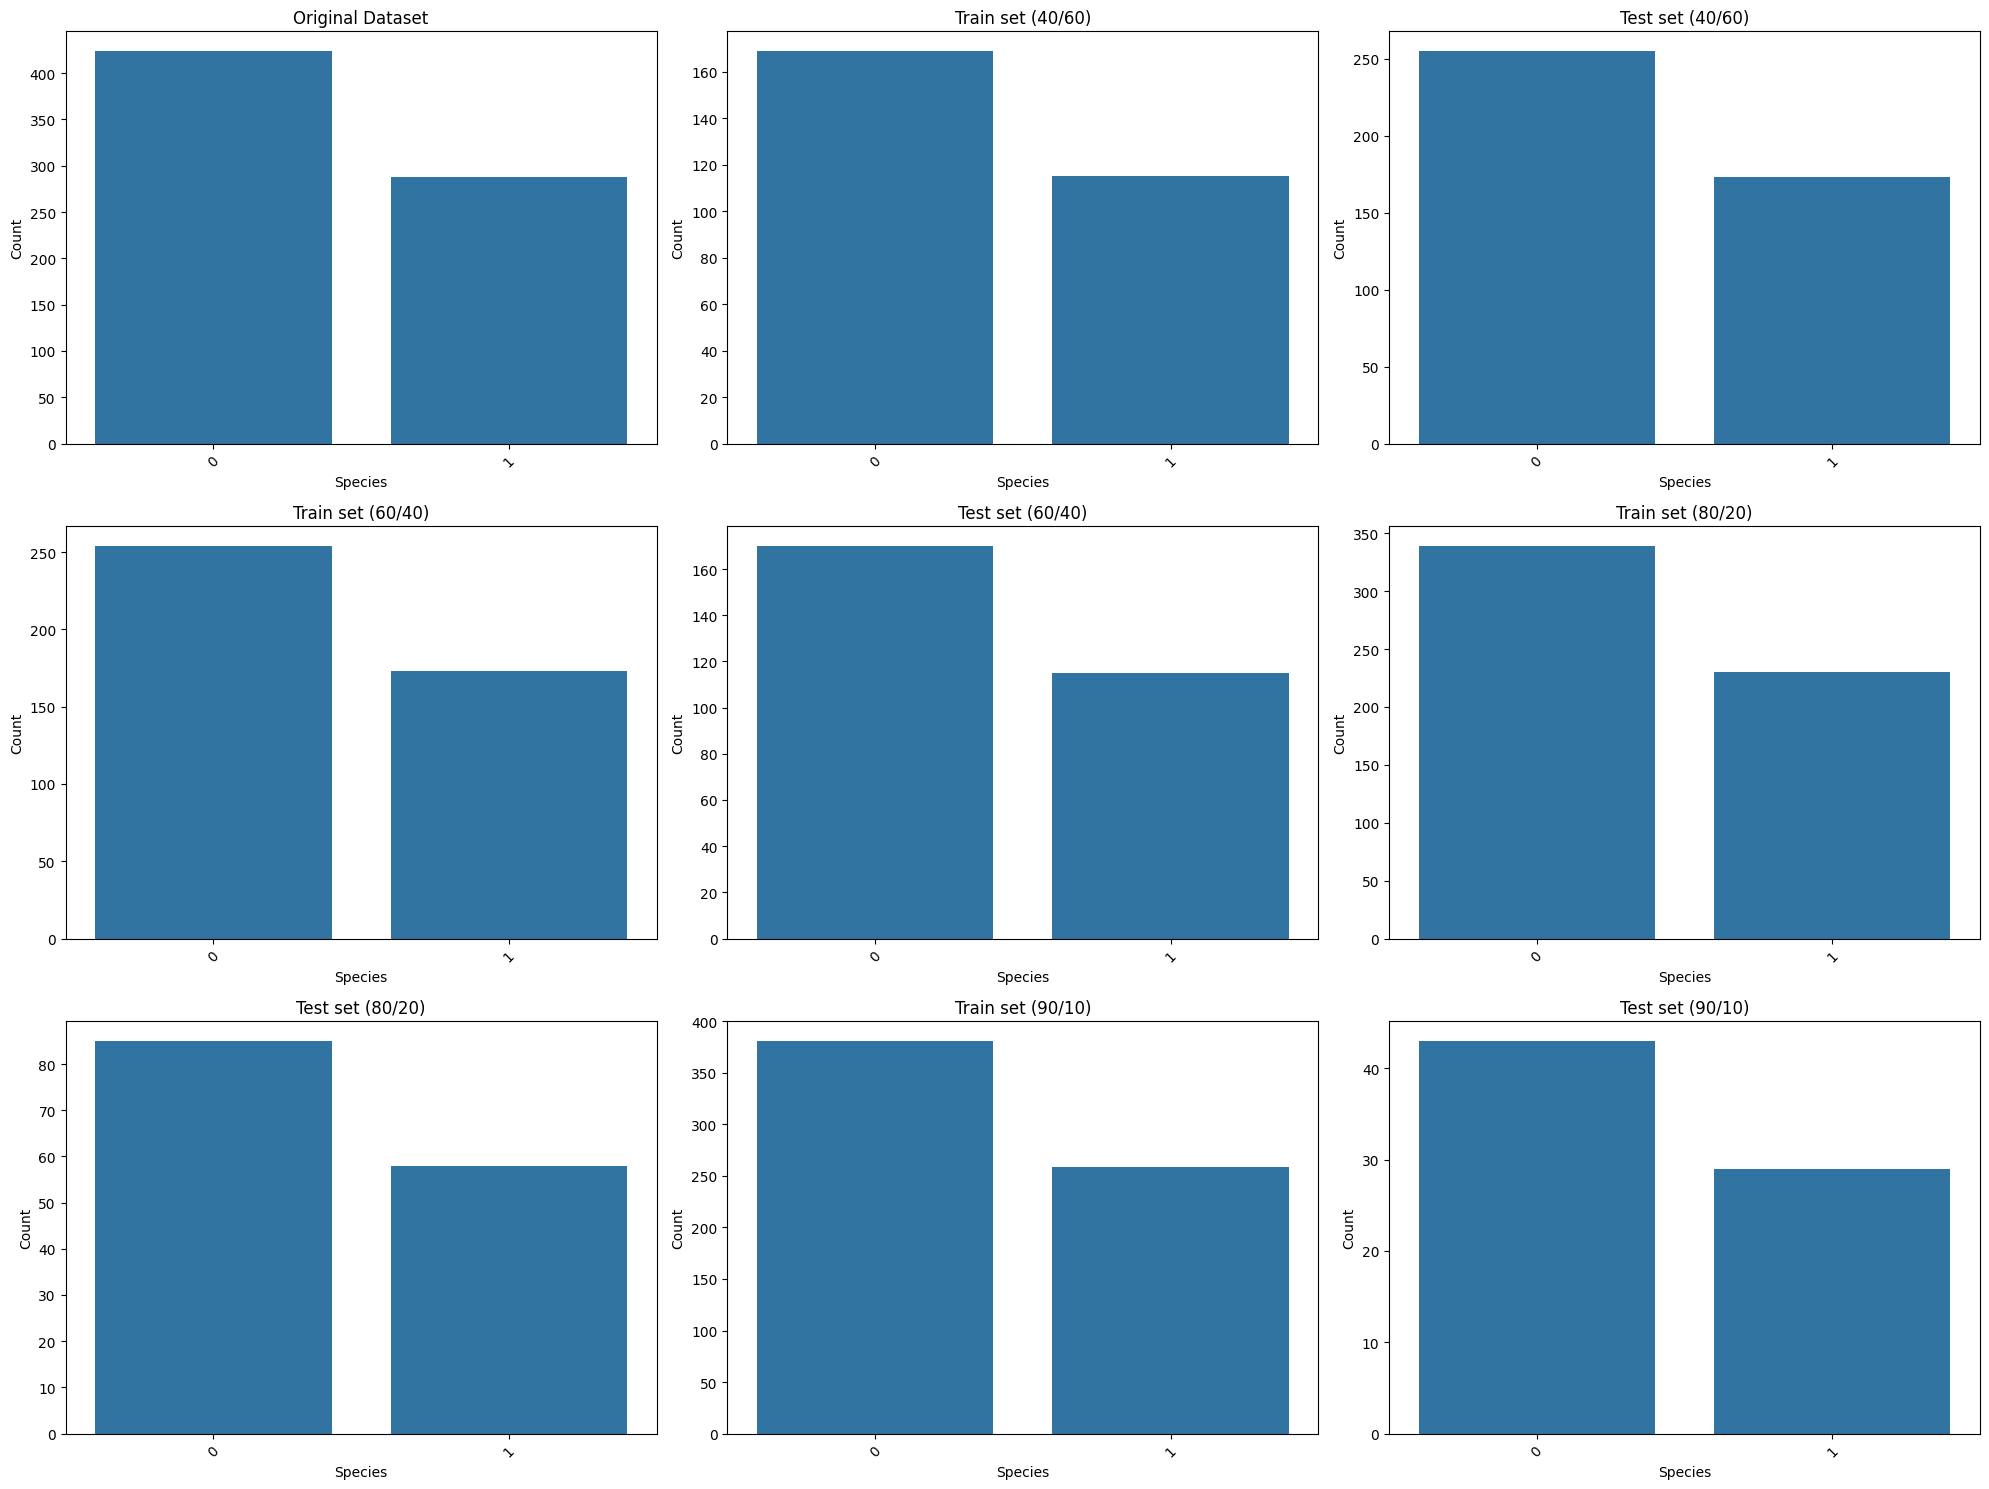

In [5]:
FEATURES = DATA.drop(columns='Survived')
FEATURES = pd.get_dummies(FEATURES, drop_first=True)
LABELS = DATA["Survived"]


features_train1 , features_test1, labels_train1, labels_test1 = train_test_split(FEATURES, LABELS, test_size=0.6, random_state=42, stratify=LABELS)
features_train2, features_test2, labels_train2, labels_test2 = train_test_split(FEATURES, LABELS, test_size=0.4, random_state=42, stratify=LABELS)
features_train3, features_test3, labels_train3, labels_test3 = train_test_split(FEATURES, LABELS, test_size=0.2, random_state=42, stratify=LABELS)
features_train4, features_test4, labels_train4, labels_test4 = train_test_split(FEATURES, LABELS, test_size=0.1, random_state=42, stratify=LABELS)

def plot_distribution(labels_list, titles_list):
    plt.figure(figsize=(20, 15))  # Tăng chiều cao vì có 3 dòng
    
    for i, (labels, title) in enumerate(zip(labels_list, titles_list), 1):
        plt.subplot(3, 3, i)  # 3 dòng, 3 cột
        sns.countplot(x=labels)
        plt.title(title)
        plt.xticks(rotation=45)
        plt.xlabel('Species')
        plt.ylabel('Count')
    
    plt.tight_layout()
    plt.show()

# Các nhãn cần visualize
labels_list = [
    LABELS,
    labels_train1, labels_test1,
    labels_train2, labels_test2,
    labels_train3, labels_test3,
    labels_train4, labels_test4
]

# Tên tương ứng
titles_list = [
    "Original Dataset",
    "Train set (40/60)", "Test set (40/60)",
    "Train set (60/40)", "Test set (60/40)",
    "Train set (80/20)", "Test set (80/20)",
    "Train set (90/10)", "Test set (90/10)"
]

# Gọi hàm để vẽ
plot_distribution(labels_list, titles_list)

# TRAIN MODEL 

In [6]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=2 , random_state= 42)
clf.fit(features_train1, labels_train1)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

In [7]:
clf2 = DecisionTreeClassifier(criterion="entropy", max_depth=2 , random_state= 42)
clf2.fit(features_train2, labels_train2)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

In [8]:
clf3 = DecisionTreeClassifier(criterion="entropy", max_depth=2 , random_state= 42)
clf3.fit(features_train3, labels_train3)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

In [9]:
clf4 = DecisionTreeClassifier(criterion="entropy", max_depth=2 , random_state= 42)
clf4.fit(features_train4, labels_train4)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

# VISUALIZE DECISION TREE

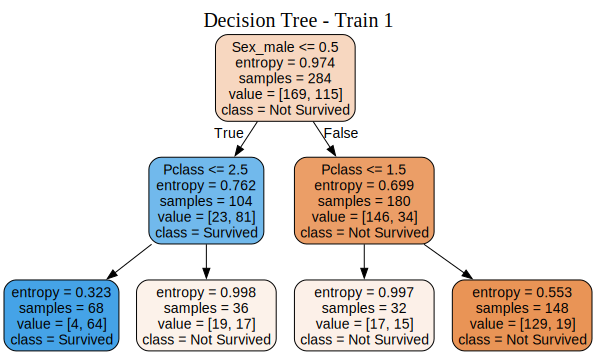

In [10]:
dot_data = export_graphviz(clf, 
          feature_names=features_train1.columns, 
          class_names=["Not Survived", "Survived"], 
          filled=True, 
          rounded=True, 
          )

dot_data = dot_data.replace('digraph Tree {', 'digraph Tree {\nlabel="Decision Tree - Train 1"; labelloc=top; fontsize=20;')

graph = graphviz.Source(dot_data)
graph


Confusion Matrix:
[[250   5]
 [ 89  84]]


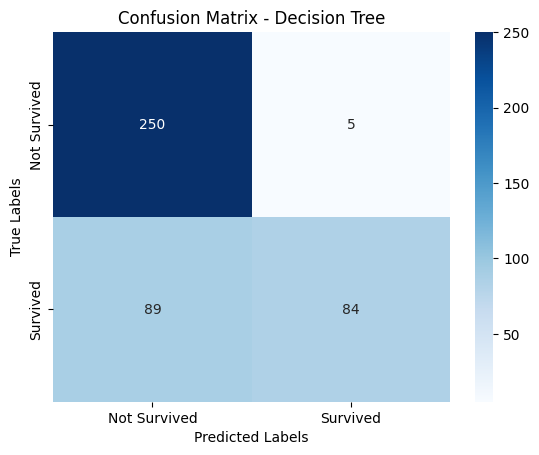


Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.98      0.84       255
           1       0.94      0.49      0.64       173

    accuracy                           0.78       428
   macro avg       0.84      0.73      0.74       428
weighted avg       0.82      0.78      0.76       428



In [11]:
y_pred = clf.predict(features_test1)
cm = confusion_matrix(labels_test1, y_pred)
print("Confusion Matrix:")
print(cm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Not Survived", "Survived"],
            yticklabels=["Not Survived", "Survived"])

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

print("\nClassification Report:")
print(classification_report(labels_test1, y_pred))

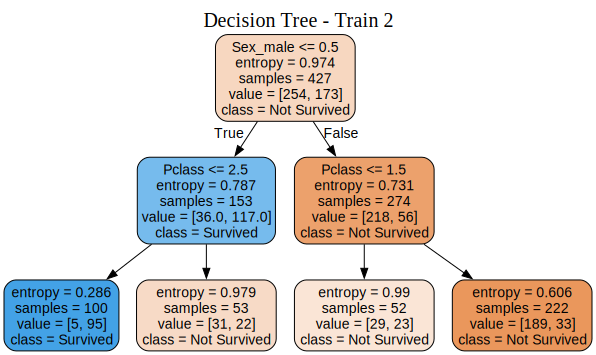

Confusion Matrix:
[[166   4]
 [ 62  53]]


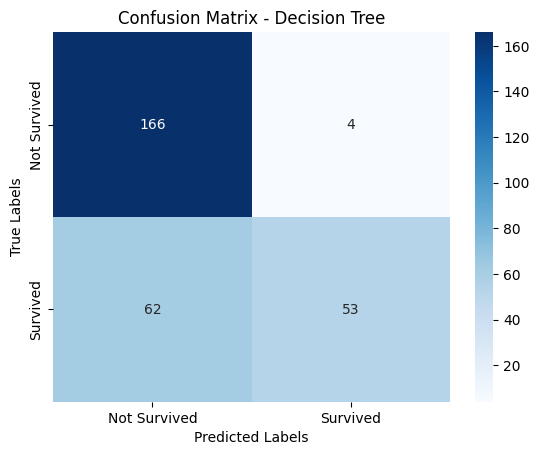


Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.98      0.83       170
           1       0.93      0.46      0.62       115

    accuracy                           0.77       285
   macro avg       0.83      0.72      0.73       285
weighted avg       0.81      0.77      0.75       285



In [12]:
dot_data = export_graphviz(clf2, 
          feature_names=features_train2.columns, 
          class_names=["Not Survived", "Survived"], 
          filled=True, 
          rounded=True, 
          )

dot_data = dot_data.replace('digraph Tree {', 'digraph Tree {\nlabel="Decision Tree - Train 2"; labelloc=top; fontsize=20;')

graph = graphviz.Source(dot_data)
display(graph)


y_pred2 = clf.predict(features_test2)
cm = confusion_matrix(labels_test2, y_pred2)
print("Confusion Matrix:")
print(cm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Not Survived", "Survived"],
            yticklabels=["Not Survived", "Survived"])

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

print("\nClassification Report:")
print(classification_report(labels_test2, y_pred2))

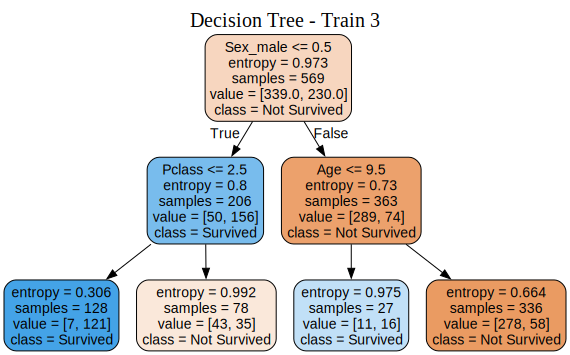

Confusion Matrix:
[[83  2]
 [31 27]]


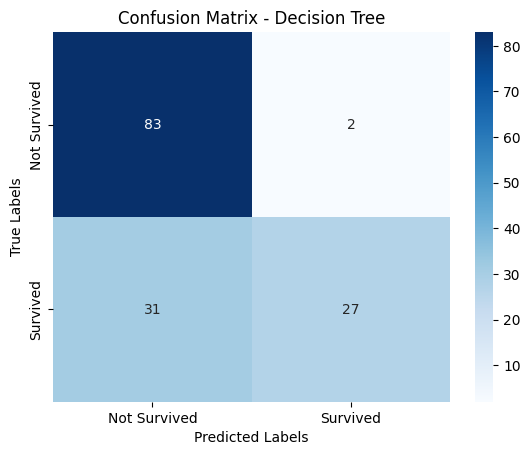


Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.98      0.83        85
           1       0.93      0.47      0.62        58

    accuracy                           0.77       143
   macro avg       0.83      0.72      0.73       143
weighted avg       0.81      0.77      0.75       143



In [13]:
dot_data = export_graphviz(clf3, 
          feature_names=features_train3.columns, 
          class_names=["Not Survived", "Survived"], 
          filled=True, 
          rounded=True, 
        )
dot_data = dot_data.replace('digraph Tree {', 'digraph Tree {\nlabel="Decision Tree - Train 3"; labelloc=top; fontsize=20;')

# Tạo graph từ dot data
graph = graphviz.Source(dot_data)
display(graph)

y_pred3 = clf.predict(features_test3)
cm = confusion_matrix(labels_test3, y_pred3)
print("Confusion Matrix:")
print(cm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Not Survived", "Survived"],
            yticklabels=["Not Survived", "Survived"])

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

print("\nClassification Report:")
print(classification_report(labels_test3, y_pred3))

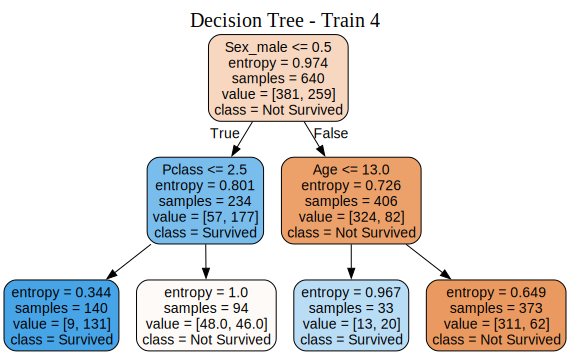

Confusion Matrix:
[[43  0]
 [12 17]]


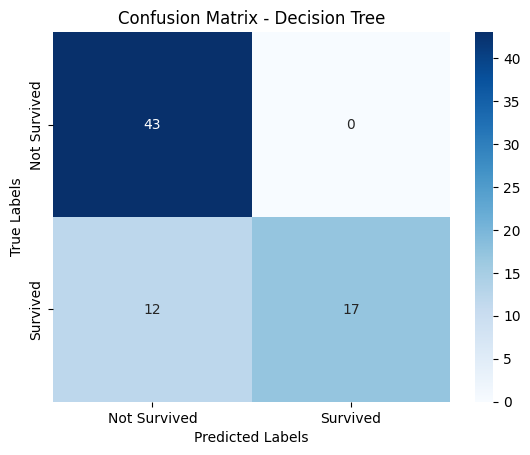


Classification Report:
              precision    recall  f1-score   support

           0       0.78      1.00      0.88        43
           1       1.00      0.59      0.74        29

    accuracy                           0.83        72
   macro avg       0.89      0.79      0.81        72
weighted avg       0.87      0.83      0.82        72



In [14]:
dot_data = export_graphviz(clf4, 
          feature_names=features_train2.columns, 
          class_names=["Not Survived", "Survived"], 
          filled=True, 
          rounded=True, 
          )
dot_data = dot_data.replace('digraph Tree {', 'digraph Tree {\nlabel="Decision Tree - Train 4"; labelloc=top; fontsize=20;')

# Tạo graph từ dot data
graph = graphviz.Source(dot_data)
display(graph)

y_pred4 = clf.predict(features_test4)
cm = confusion_matrix(labels_test4, y_pred4)
print("Confusion Matrix:")
print(cm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Not Survived", "Survived"],
            yticklabels=["Not Survived", "Survived"])

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

print("\nClassification Report:")
print(classification_report(labels_test4, y_pred4))

# EVALUATION METRICS

In [15]:
accuracy = accuracy_score(labels_test1, y_pred)

# Ratio of wrong labels valuation
misclassified_count = (y_pred != labels_test1).sum()
total_samples = len(labels_test1)
misclassified_rate = 100 * misclassified_count / total_samples
# Visualization of the ratio of wrong labels
print(f"Numbers of Wrong labels: {misclassified_count}/{total_samples}")
print(f"Ratio of wrong labels: {misclassified_rate:.2f}%")

Numbers of Wrong labels: 94/428
Ratio of wrong labels: 21.96%


In [16]:
accuracy = accuracy_score(labels_test2, y_pred2)

# Ratio of wrong labels valuation
misclassified_count = (y_pred2 != labels_test2).sum()
total_samples = len(labels_test2)
misclassified_rate = 100 * misclassified_count / total_samples
# Visualization of the ratio of wrong labels
print(f"Numbers of Wrong labels: {misclassified_count}/{total_samples}")
print(f"Ratio of wrong labels: {misclassified_rate:.2f}%")

Numbers of Wrong labels: 66/285
Ratio of wrong labels: 23.16%


In [17]:
accuracy = accuracy_score(labels_test3, y_pred3)

# Ratio of wrong labels valuation
misclassified_count = (y_pred3 != labels_test3).sum()
total_samples = len(labels_test3)
misclassified_rate = 100 * misclassified_count / total_samples
# Visualization of the ratio of wrong labels
print(f"Numbers of Wrong labels: {misclassified_count}/{total_samples}")
print(f"Ratio of wrong labels: {misclassified_rate:.2f}%")

Numbers of Wrong labels: 33/143
Ratio of wrong labels: 23.08%


In [18]:
accuracy = accuracy_score(labels_test4, y_pred4)

# Ratio of wrong labels valuation
misclassified_count = (y_pred4 != labels_test4).sum()
total_samples = len(labels_test4)
misclassified_rate = 100 * misclassified_count / total_samples
# Visualization of the ratio of wrong labels
print(f"Numbers of Wrong labels: {misclassified_count}/{total_samples}")
print(f"Ratio of wrong labels: {misclassified_rate:.2f}%")

Numbers of Wrong labels: 12/72
Ratio of wrong labels: 16.67%


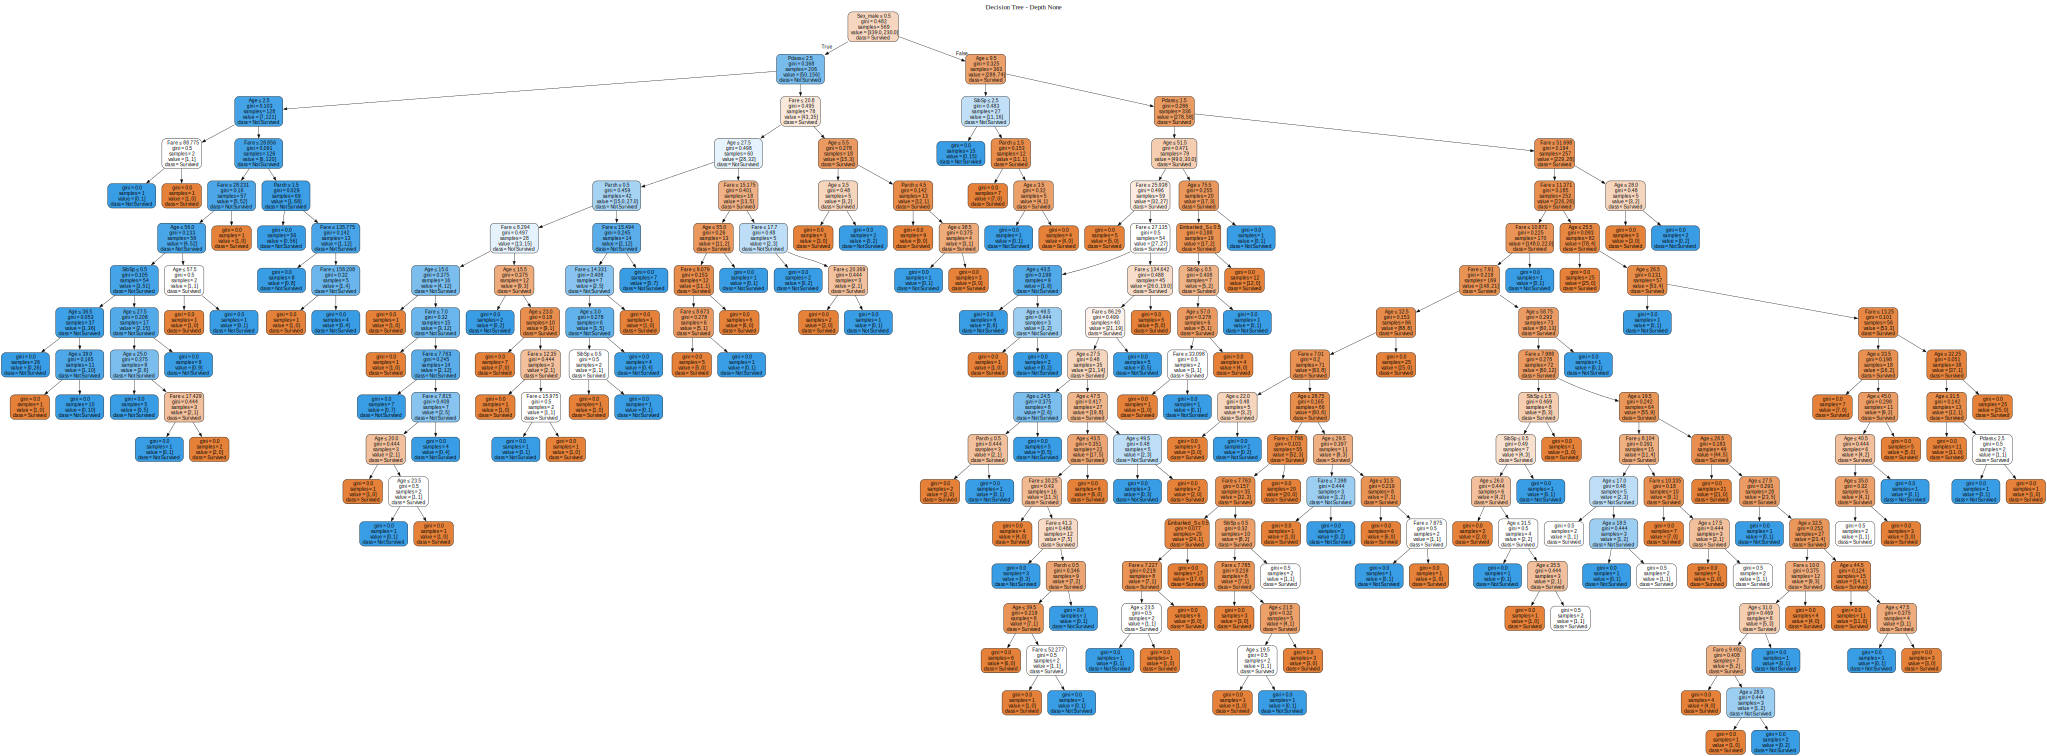

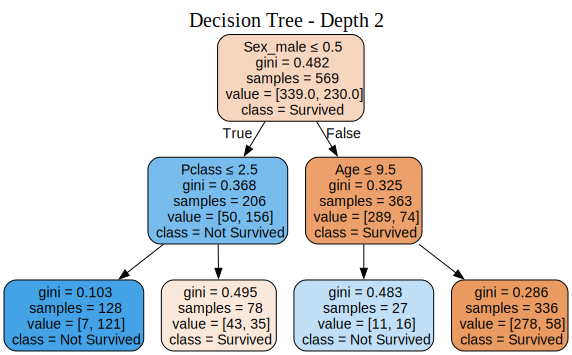

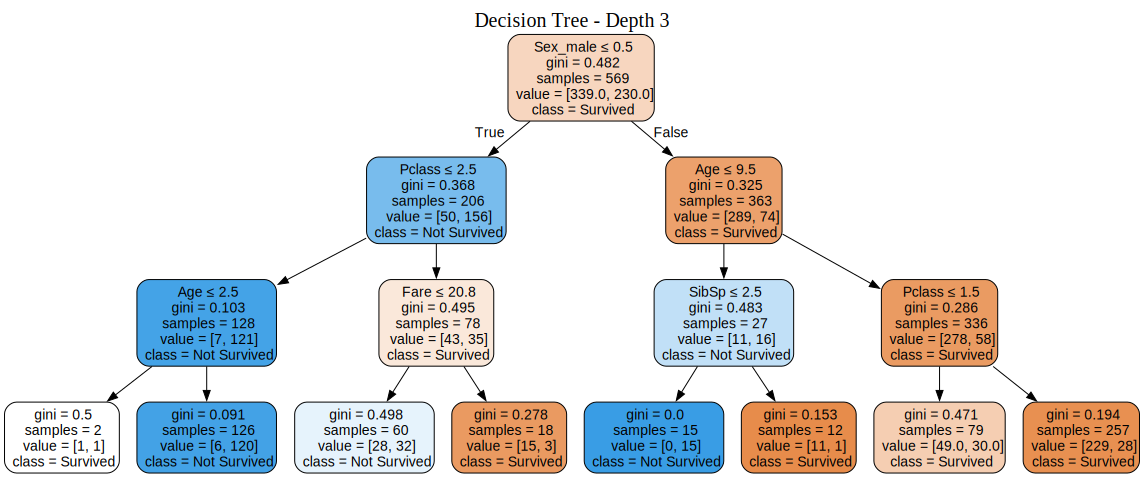

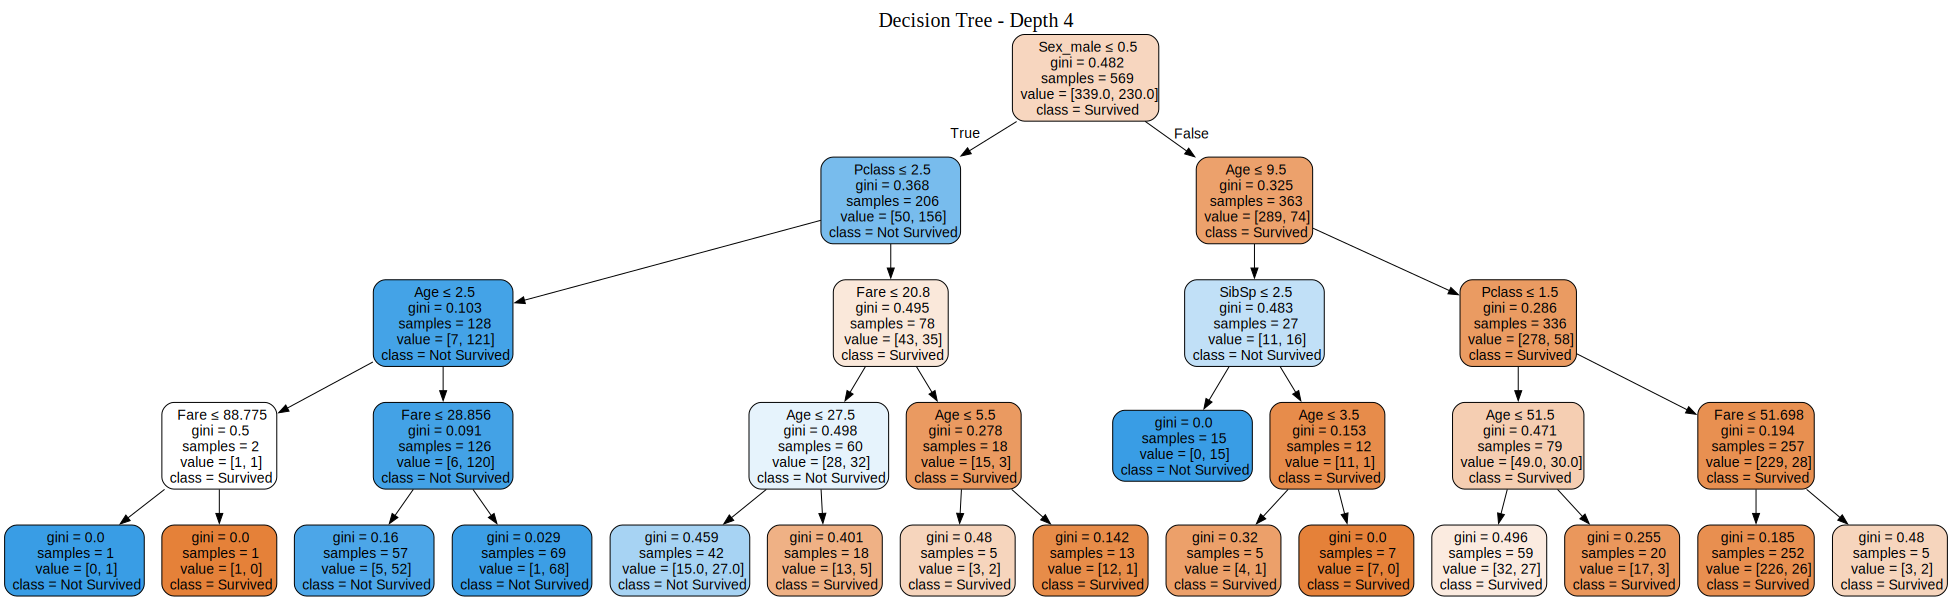

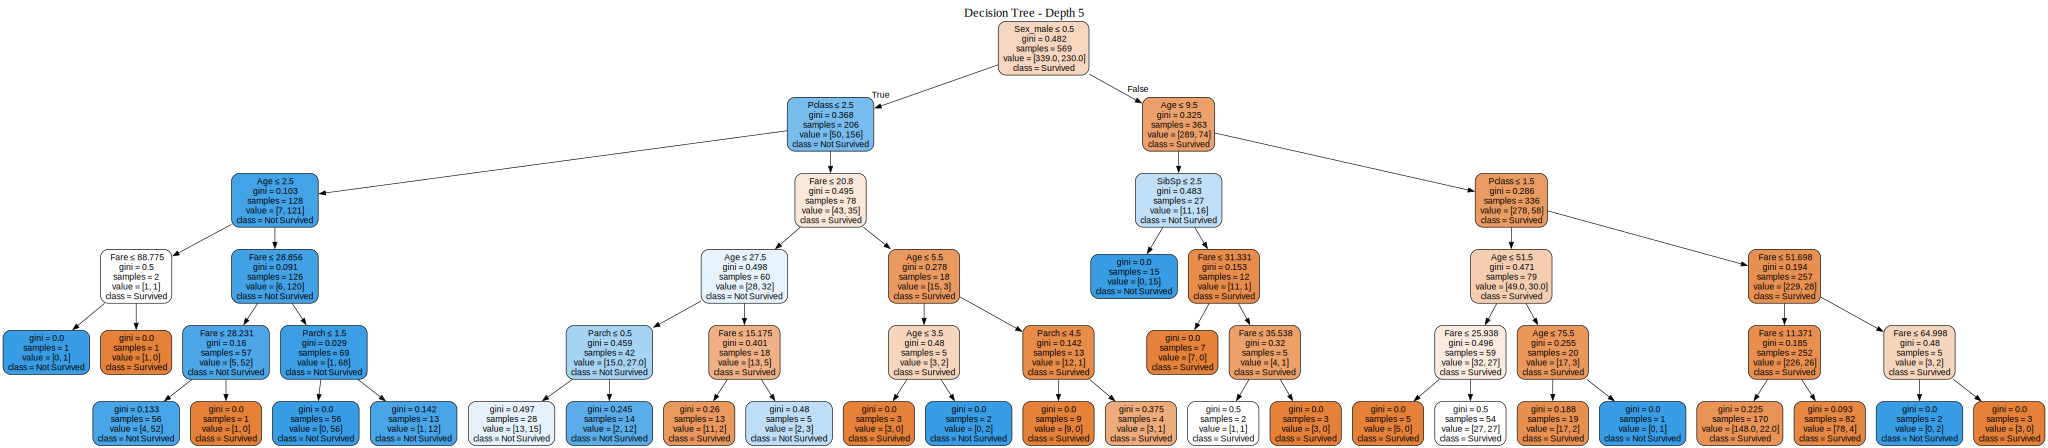

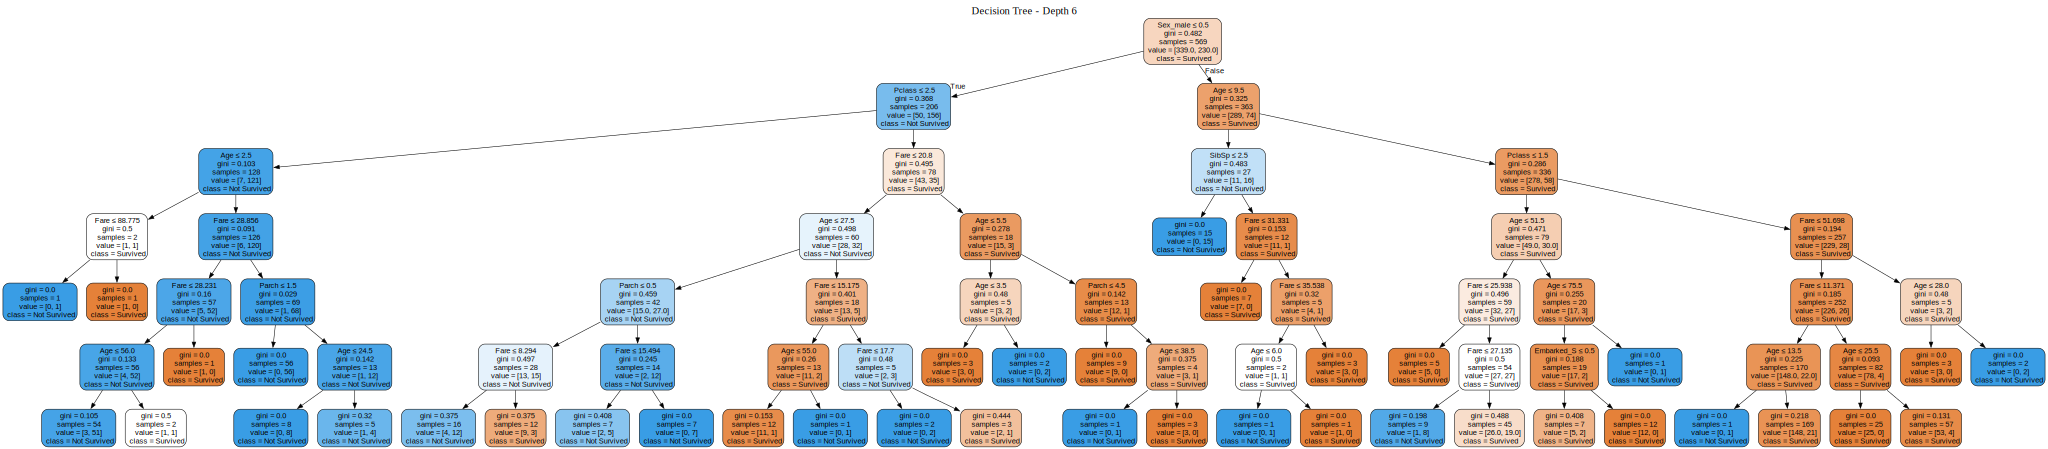

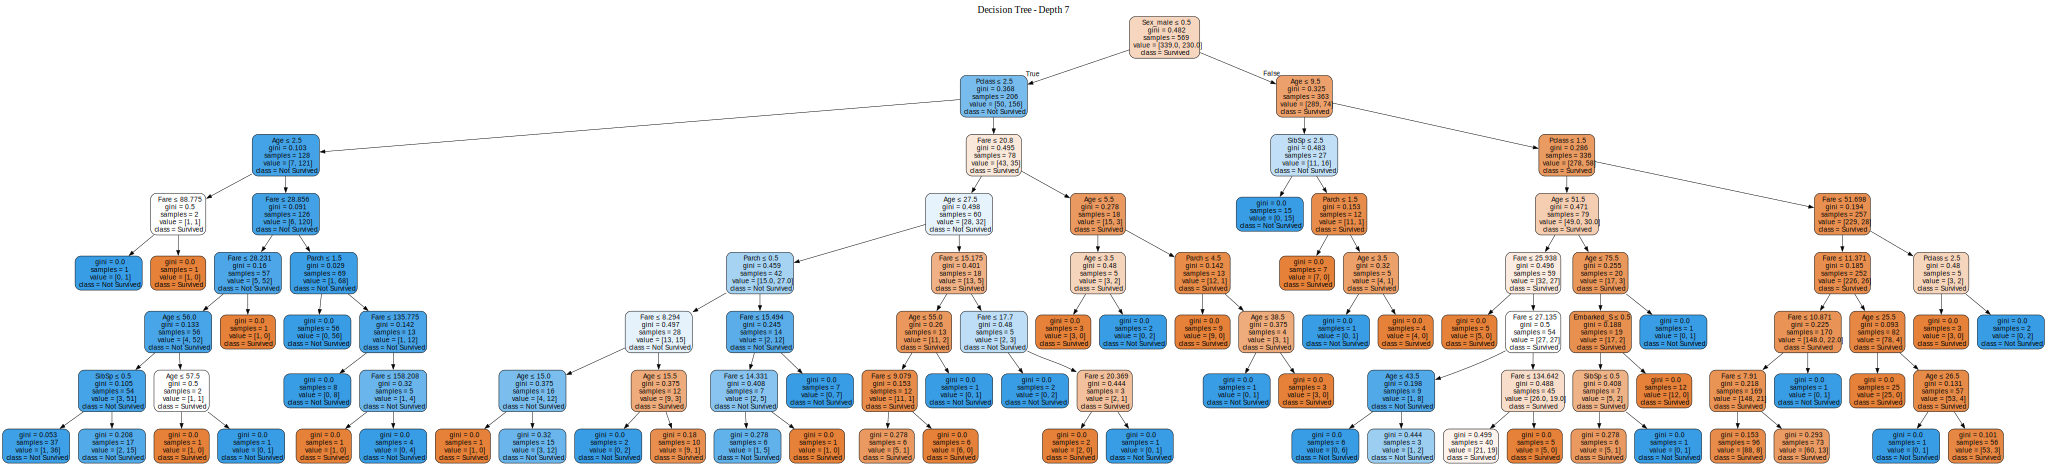

Max Depth | Test Accuracy
-------------------------
     None | 0.6853
        2 | 0.7762
        3 | 0.8252
        4 | 0.8112
        5 | 0.8182
        6 | 0.8182
        7 | 0.7902


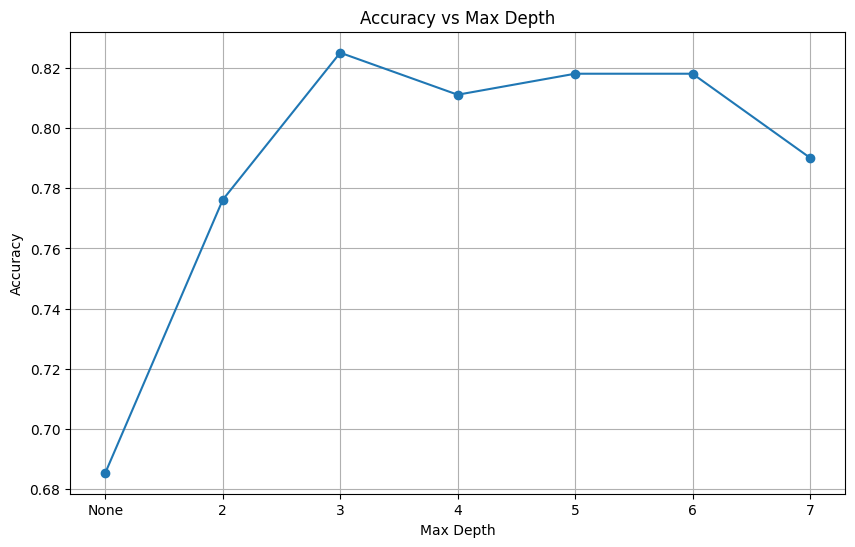

In [19]:
max_depth_values = [None, 2, 3, 4, 5, 6, 7]
accuracy_results = {}

for depth in max_depth_values:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=0)
    clf.fit(features_train3, labels_train3)
    
    # Dự đoán
    y_pred = clf.predict(features_test3)
    
    # Tính accuracy
    acc = accuracy_score(labels_test3, y_pred)
    accuracy_results[depth] = acc
    
    # Vẽ cây với graphviz
    dot_data = export_graphviz(clf, 
                               feature_names=features_train3.columns, 
                               class_names=['Survived', 'Not Survived'],
                               filled=True, 
                               rounded=True, 
                               special_characters=True)
    dot_data = dot_data.replace(
        'digraph Tree {',
        f'digraph Tree {{\nlabel="Decision Tree - Depth {depth}"; labelloc=top; fontsize=20;'
    )
    graph = graphviz.Source(dot_data)
    # Lưu file tên theo max_depth
    depth_name = "none" if depth is None else str(depth)
    display(graph)

print("Max Depth | Test Accuracy")
print("-------------------------")
for depth, acc in accuracy_results.items():
    depth_str = "None" if depth is None else str(depth)
    print(f"{depth_str:>9} | {acc:.4f}")

# Vẽ biểu đồ accuracy theo max_depth
x_values = [1 if d is None else d for d in max_depth_values]
y_values = list(accuracy_results.values())

plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, marker='o')
plt.title('Accuracy vs Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.grid()

# Đặt nhãn (label) cho trục x
plt.xticks(x_values, labels=['None', 2, 3, 4, 5, 6, 7])

plt.show()

# EXTENDED WORK : RANDOM FOREST CLASSIFICATION

Random Forest : To make it simple we know understand that Random is Random and Forest is a set of Tree. So that in this algorithm we need to build many desicion tree and each of them has randomize order and which Features is used in each step. After we random n data from the dataset then we randomize k features from the set of features(Each features could be the same) and then we weight bias of each Tree output to build the final model.

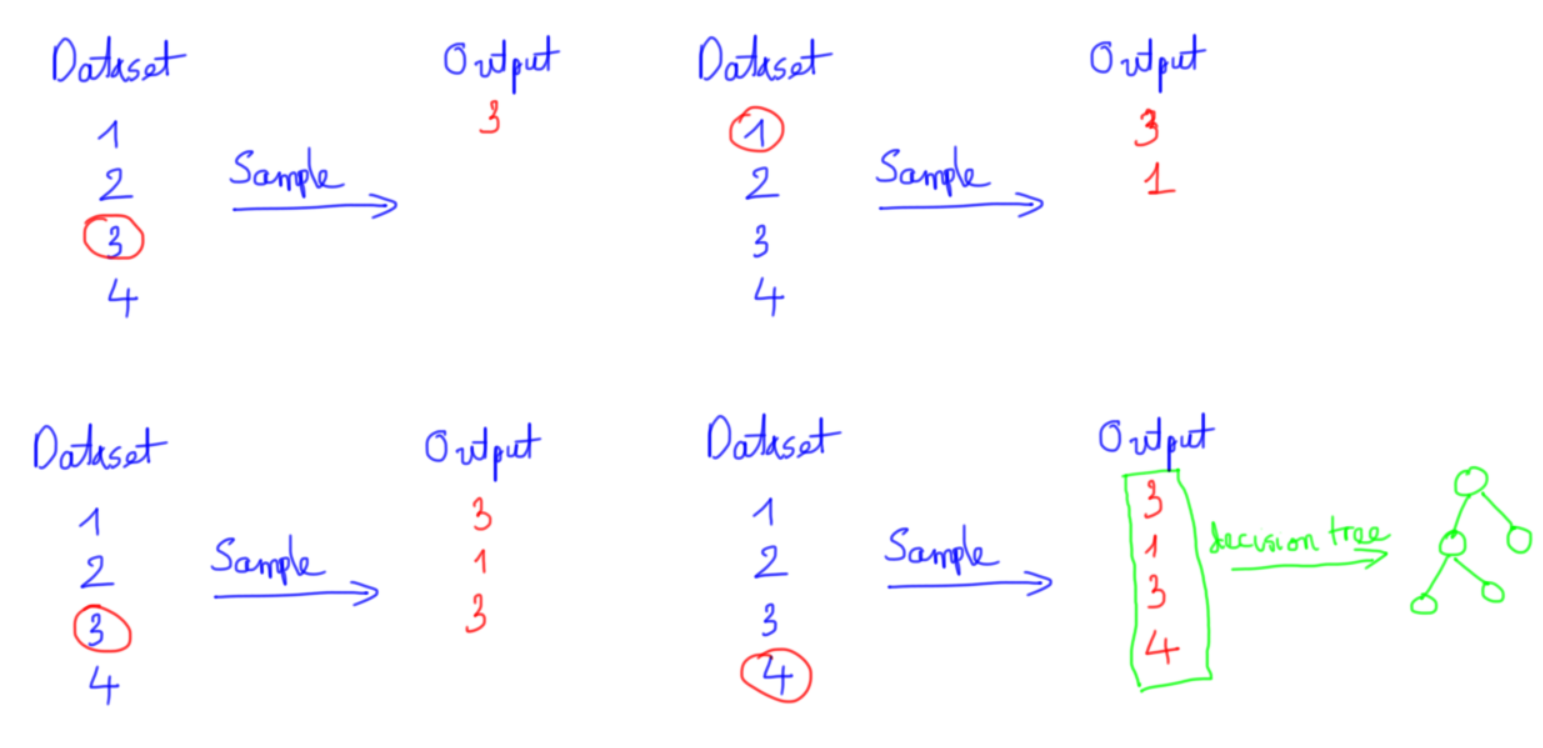

In [20]:
clf_extended = RFC(n_estimators=10, random_state=42)
clf_extended.fit(features_train1, labels_train1)

y_pred_rf = clf_extended.predict(features_test1)

# Confusion Matrix
cm_rf = confusion_matrix(labels_test1, y_pred_rf)
print("Confusion Matrix (Random Forest):")
print(cm_rf)

# Classification Report
print("Classification Report (Random Forest):")
print(classification_report(labels_test1, y_pred_rf))

Confusion Matrix (Random Forest):
[[223  32]
 [ 57 116]]
Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       255
           1       0.78      0.67      0.72       173

    accuracy                           0.79       428
   macro avg       0.79      0.77      0.78       428
weighted avg       0.79      0.79      0.79       428



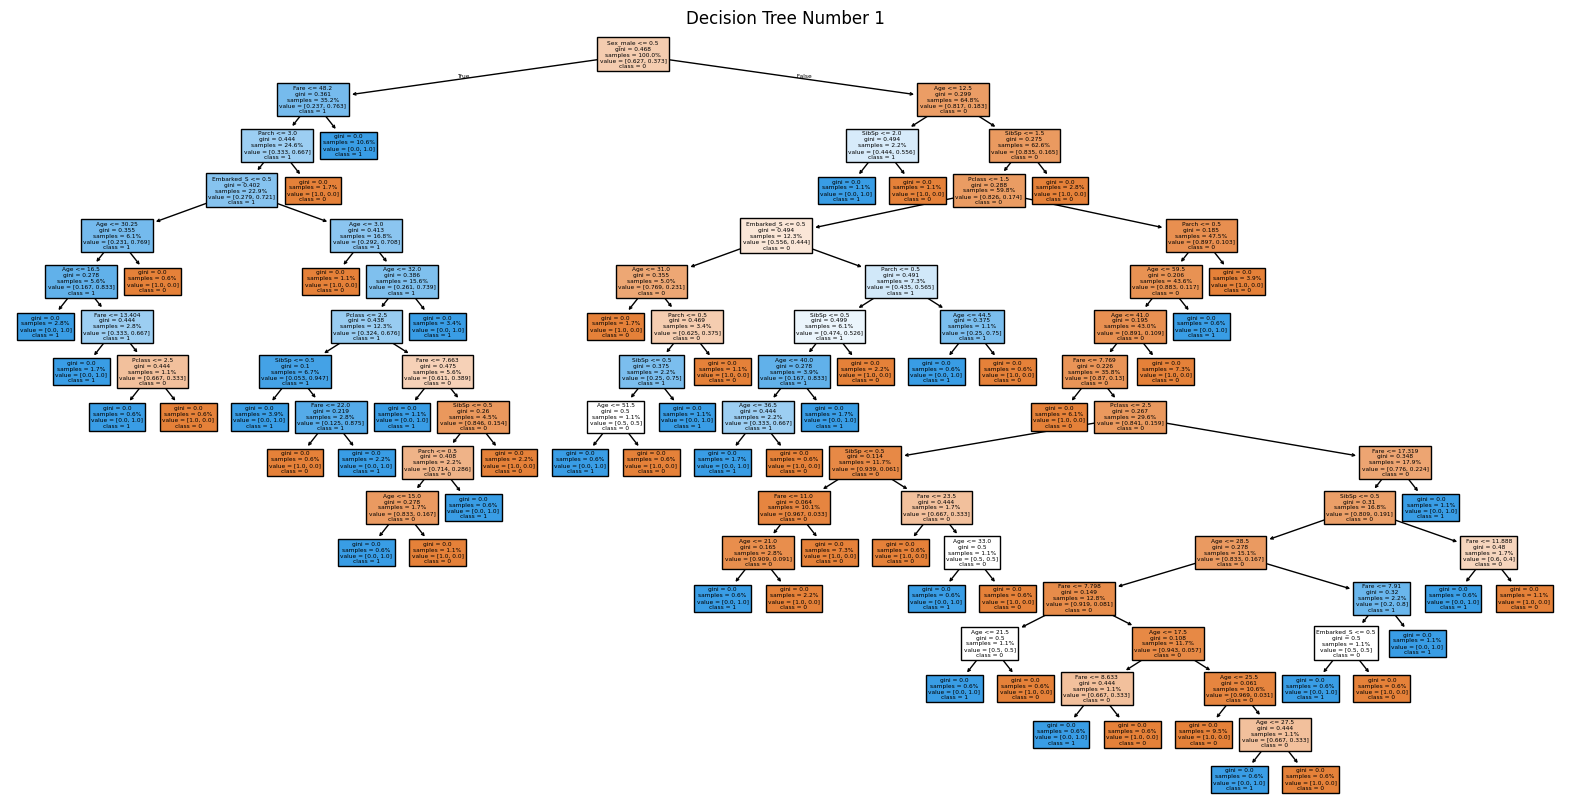

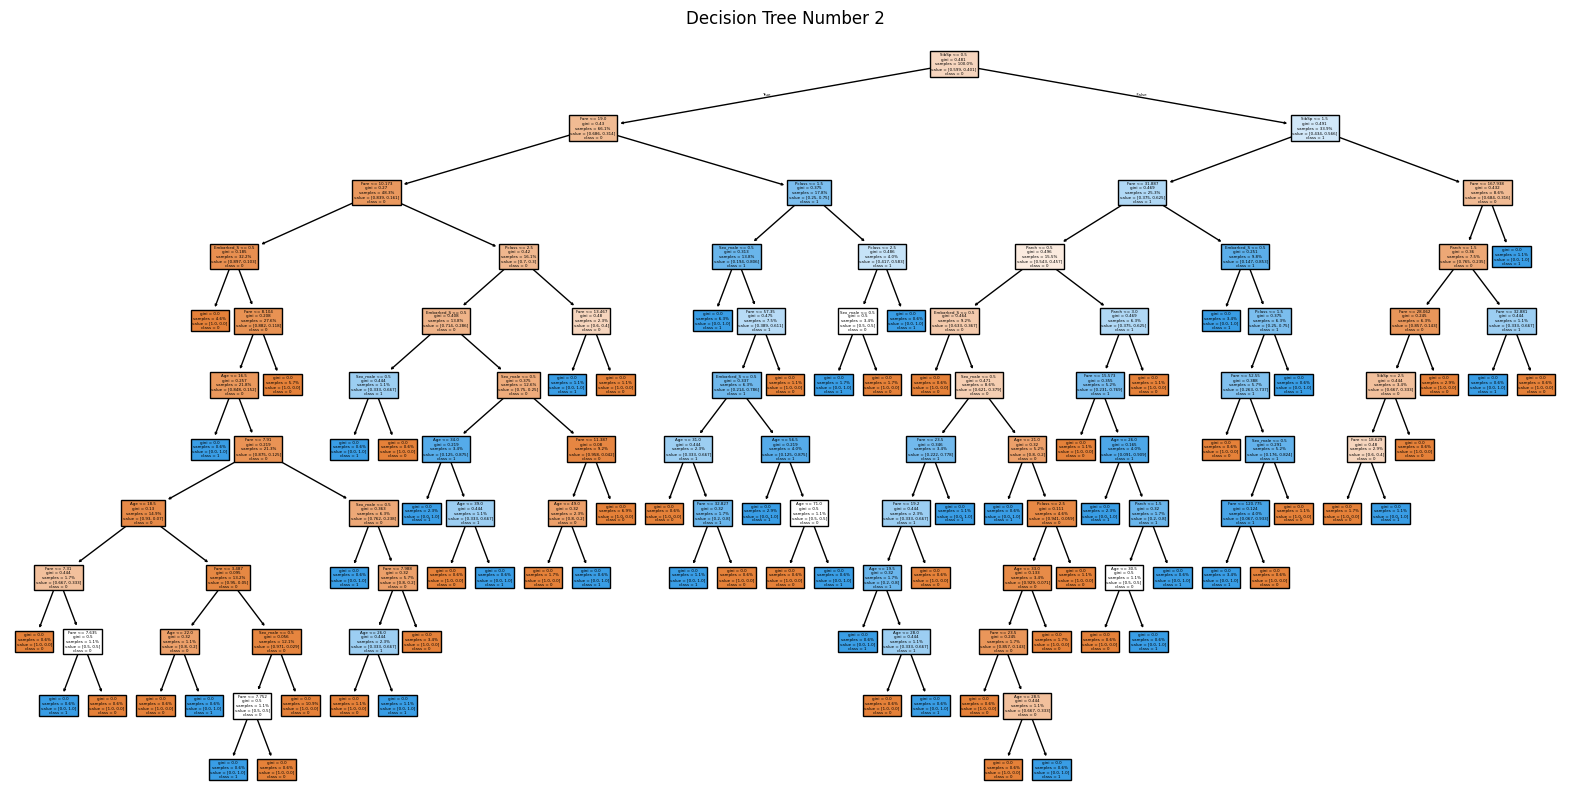

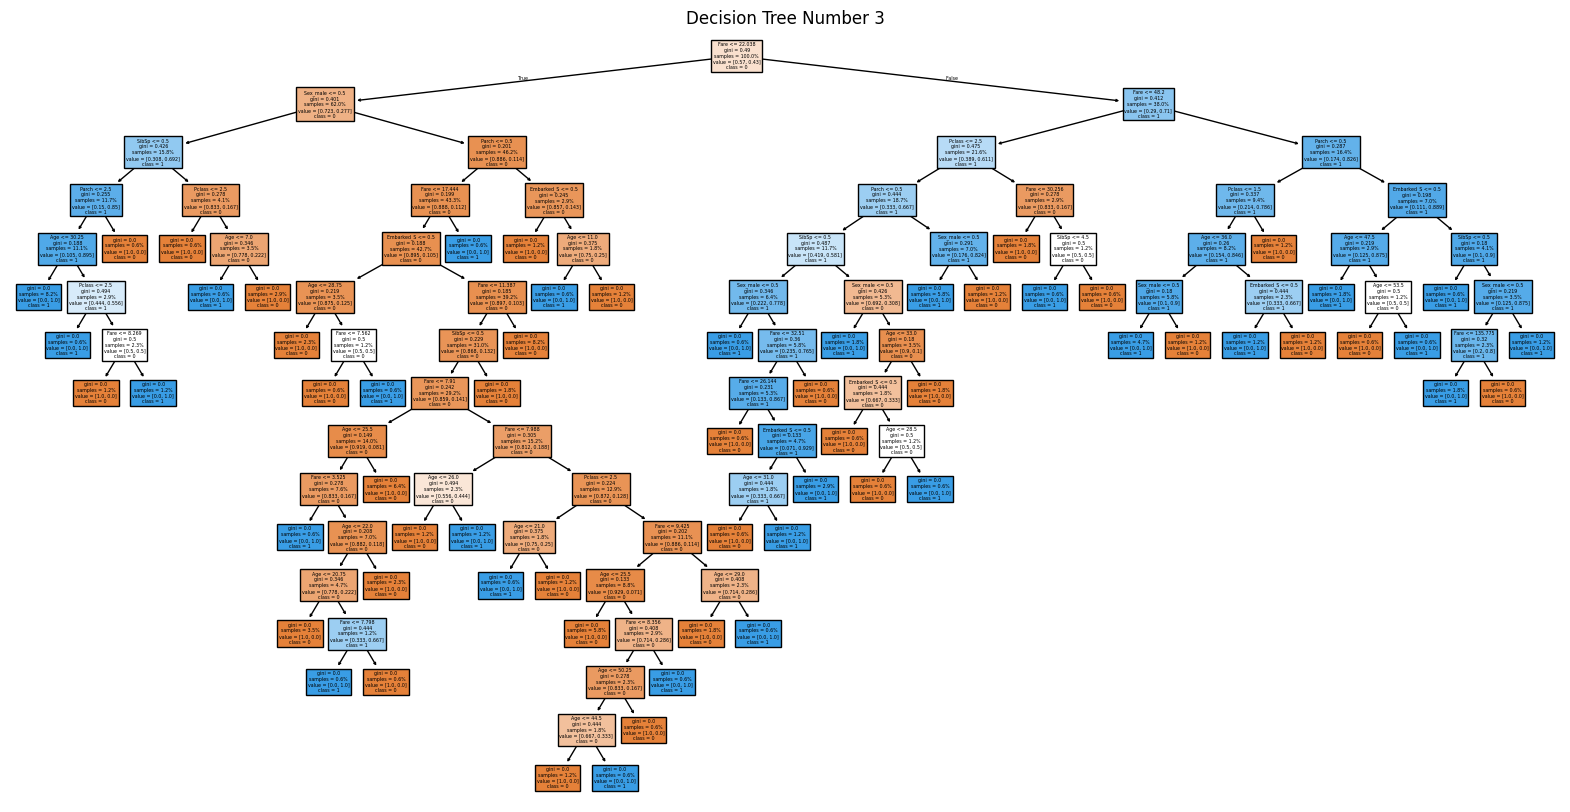

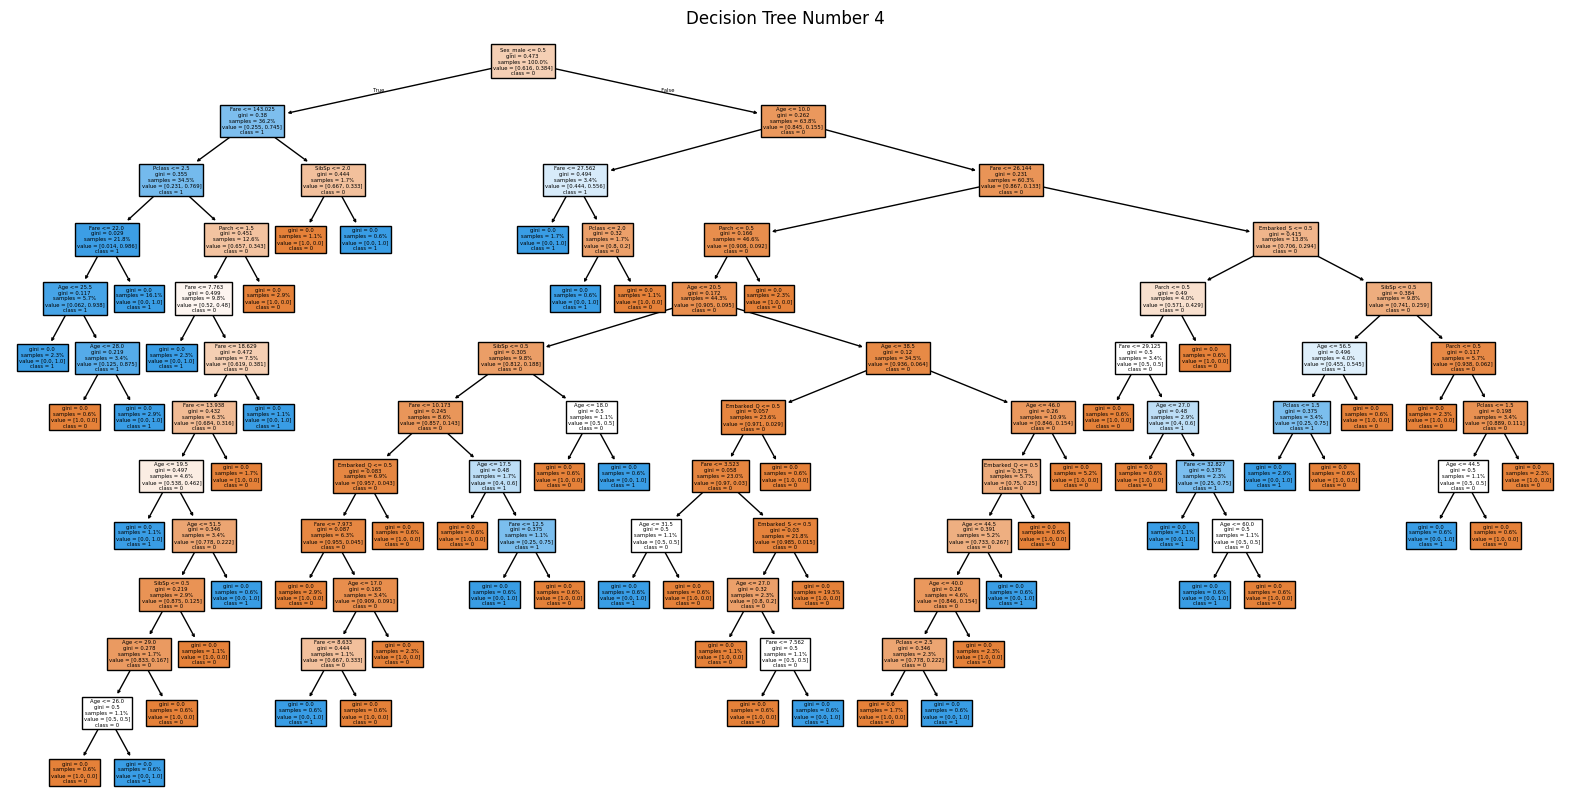

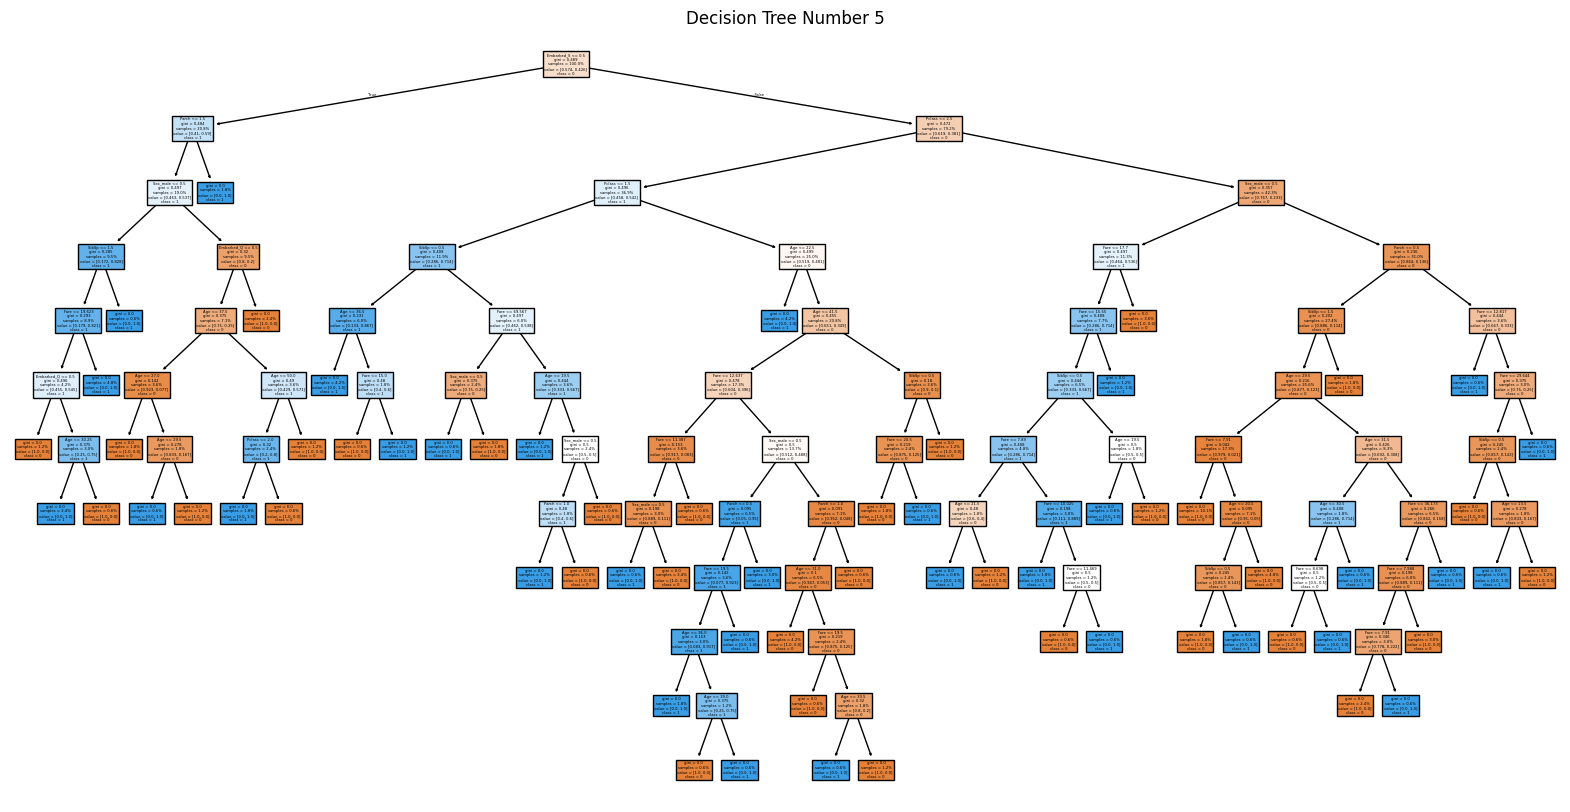

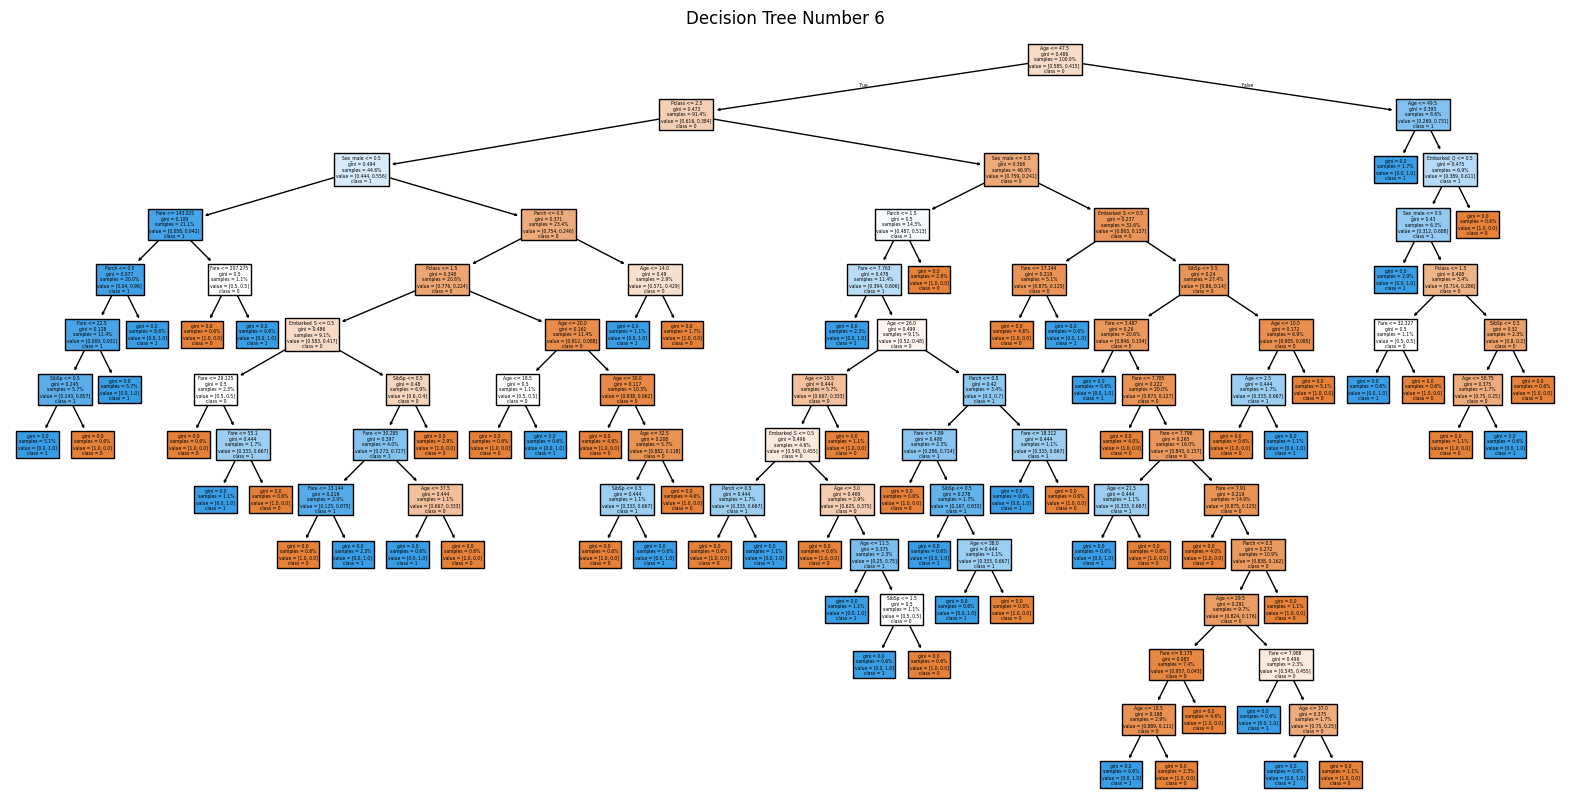

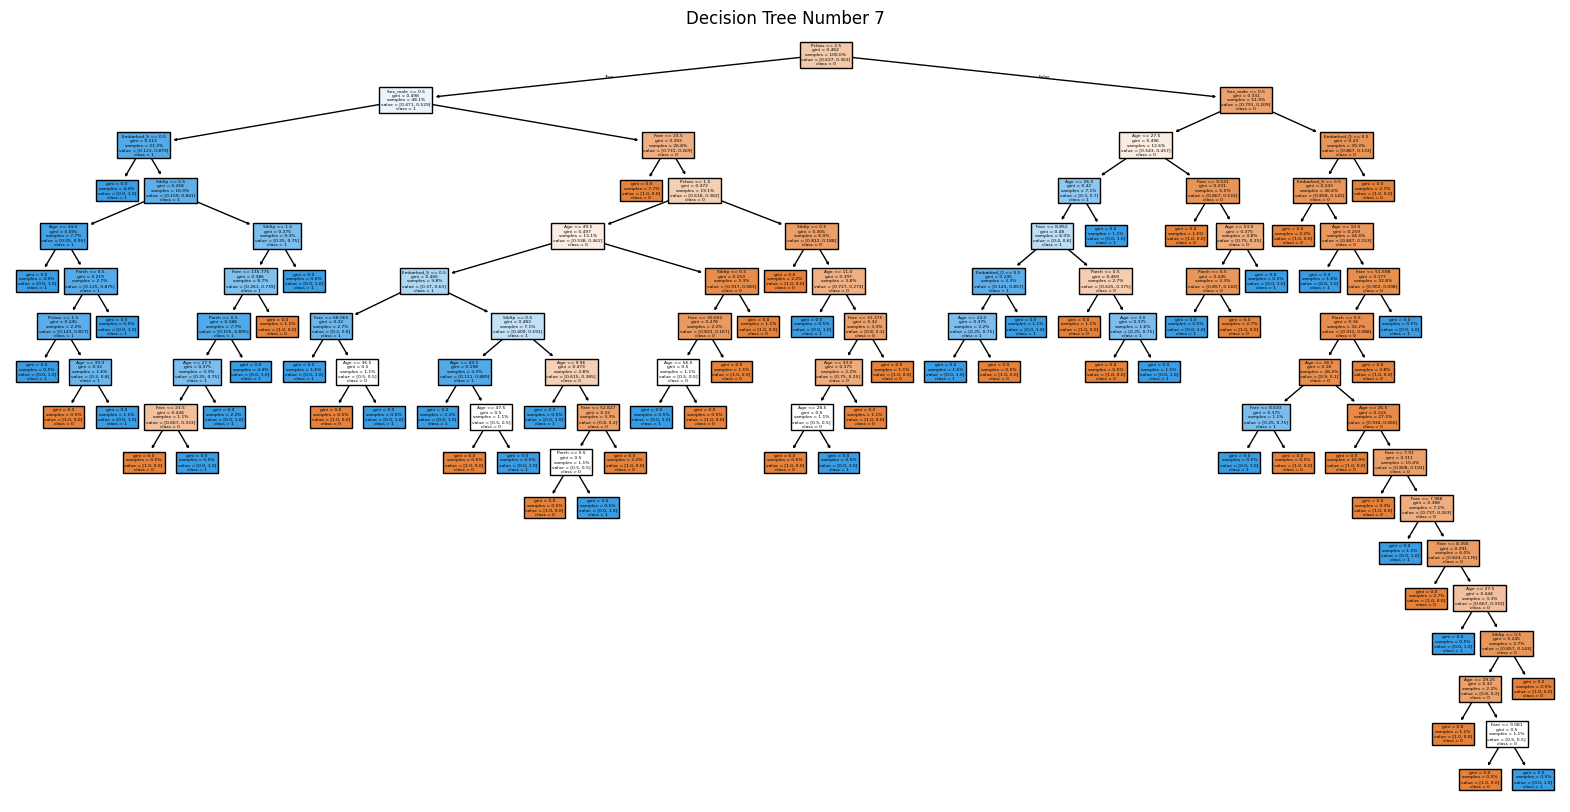

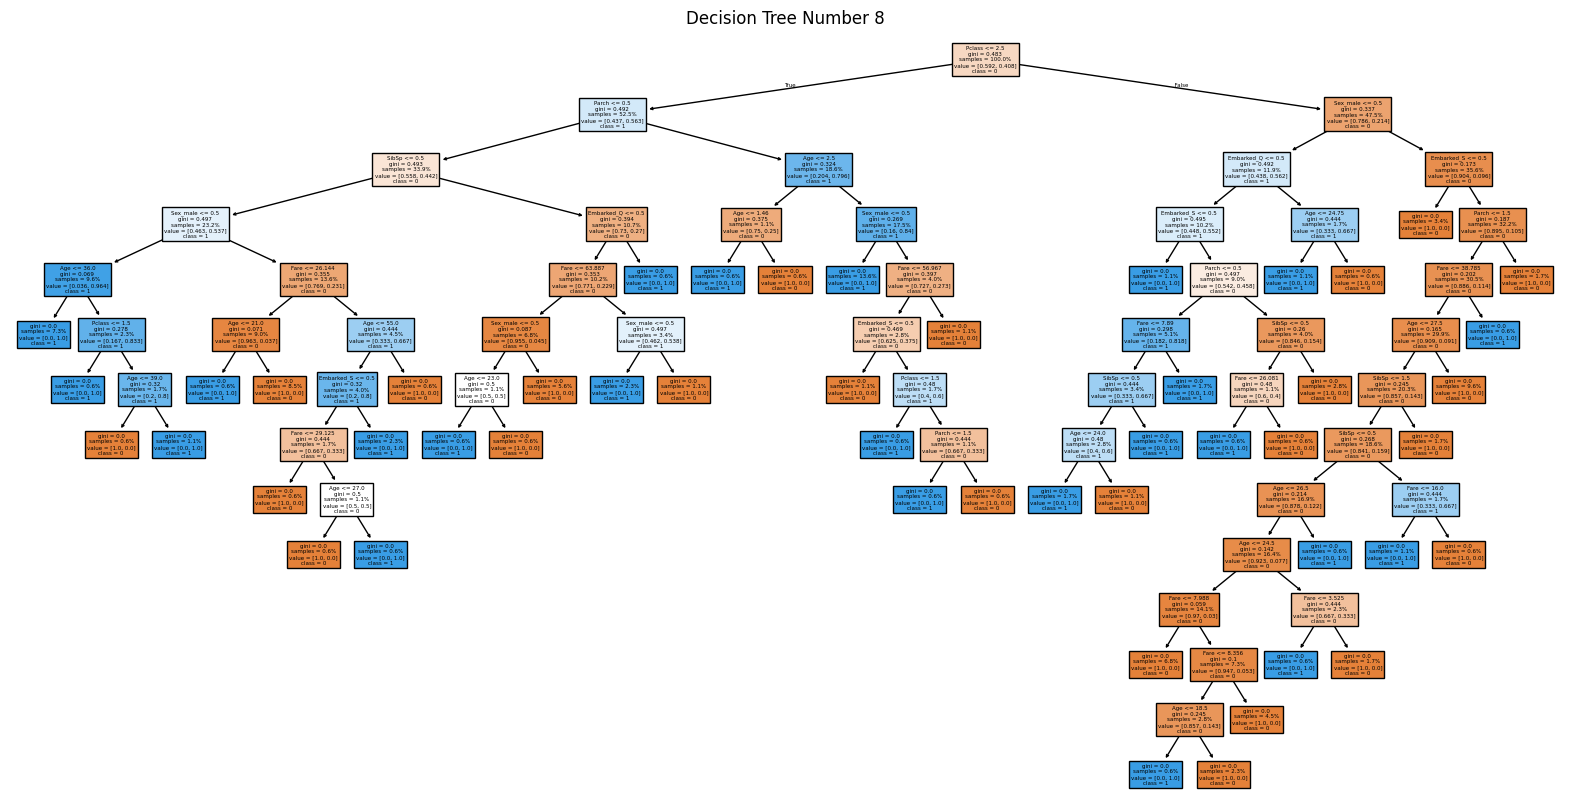

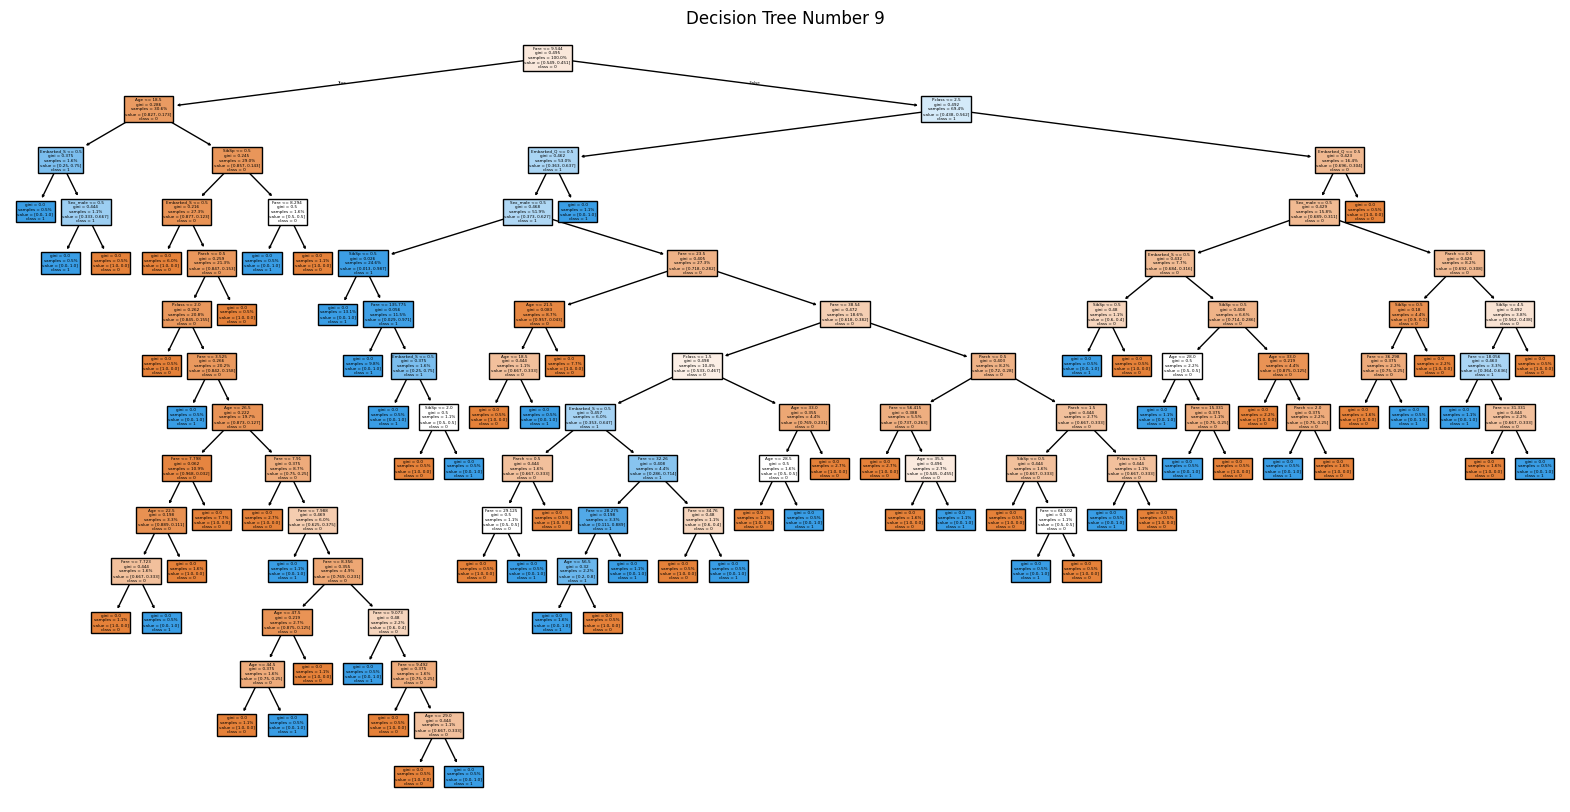

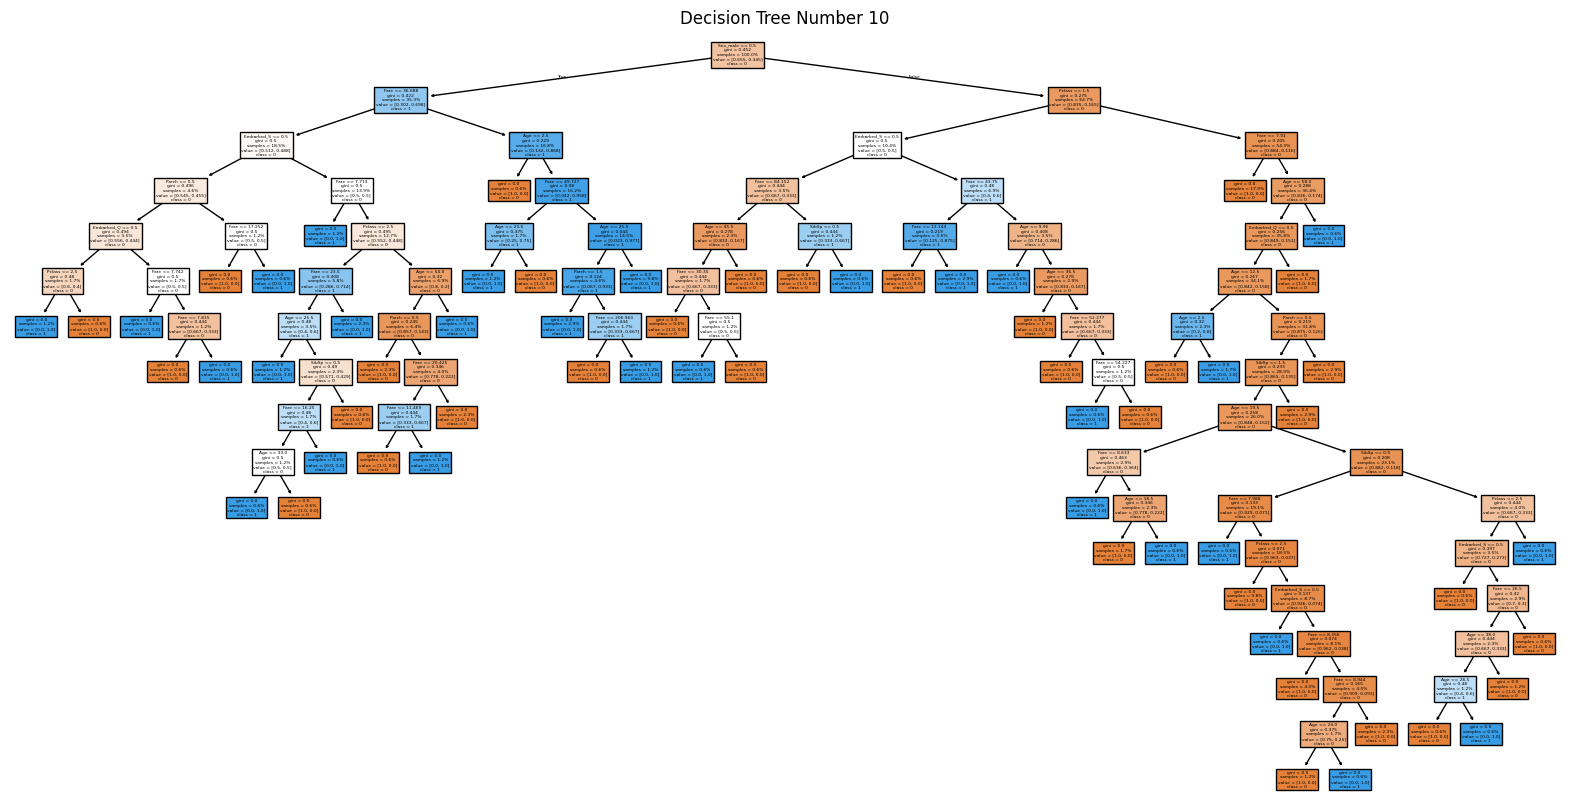

In [21]:
for i, tree in enumerate(clf_extended.estimators_):
    plt.figure(figsize=(20,10)) 
    plot_tree(tree, 
              filled=True, 
              feature_names=features_test4.columns.tolist(),  
              class_names=clf_extended.classes_.astype(str), 
              proportion=True)  
    plt.title(f"Decision Tree Number {i+1}")  
    plt.show()

In [22]:
accuracy = accuracy_score(labels_test1, y_pred_rf)

# Ratio of wrong labels valuation
misclassified_count = (y_pred_rf != labels_test1).sum()
total_samples = len(labels_test1)
misclassified_rate = 100 * misclassified_count / total_samples
# Visualization of the ratio of wrong labels
print(f"Numbers of Wrong labels: {misclassified_count}/{total_samples}")
print(f"Ratio of wrong labels: {misclassified_rate:.2f}%")

Numbers of Wrong labels: 89/428
Ratio of wrong labels: 20.79%


As we see random forest goes with a better accuracy than traditional Decision Tree.

# REFERENCES

https://machinelearningcoban.com/tabml_book/ch_model/random_forest.html<br>
